# INEGI Project unit 4

**Univiersdad Politécnica de Yucatán**

**Subject:** Data Mining

**Author:** Walter Vives

**Github:** [WalterVives](https://github.com/WalterVives)



# Porcentaje de la población de 15 años y más por entidad federativa según condición de alfabetismo, 2000 a 2015

We use the dataset of the [INEGI education](https://www.inegi.org.mx/app/tabulados/interactivos/?px=Educacion_02&bd=Educacion). We used Supervised machine learning a Decision Tree Algorithm, we will teach to the machine the ability to determine if the given data corresponds either "Alfabeta", "Analfabeta", or "No especificado".
This corresponds to the classification of the Condition literacy. 

In [ ]:
# Libraries.
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import missingno as msno
from sklearn import tree
from colorama import init, Fore, Back, Style

In [ ]:
# Reading the dataset.
inegi = pd.read_excel("Educacion.xlsx", sheet_name="Tabulado", skiprows=[0,1,2])
inegi.head()

,Unnamed: 0,Unnamed: 1,2000,2005,2010,2015
0,Estados Unidos Mexicanos,Total,100.0,100.0,100.0,100.0
1,NaN,Alfabeta,90.5,91.5,92.4,93.6
2,NaN,Analfabeta,9.5,8.4,6.9,5.5
3,NaN,No especificado,0.1,0.2,0.8,0.9
4,Aguascalientes,Total,100.0,100.0,100.0,100.0


In [ ]:
# A sample of the dataset.
inegi.sample(5)

,Unnamed: 0,Unnamed: 1,2000,2005,2010,2015
84,Puebla,Total,100.0,100.0,100.0,100.0
10,NaN,Analfabeta,3.5,3.1,2.6,2.0
24,Colima,Total,100.0,100.0,100.0,100.0
99,NaN,No especificado,0.1,0.1,0.7,0.8
16,Campeche,Total,100.0,100.0,100.0,100.0


## Preprocessing

In [ ]:
# Shape of the dataset.
print("Total columns: ", inegi.shape[1])
print("Total rows: ", inegi.shape[0])

Total columns:  6
Total rows:  132


In [ ]:
# Description of the dataset.
inegi.describe().T

,count,mean,std,min,25%,50%,75%,max
2000,132.0,50.003030,45.790644,0.1,2.225,49.95,97.750,100.0
2005,132.0,50.002273,46.222825,0.1,2.100,49.95,97.825,100.0
2010,132.0,50.001515,46.608006,0.5,2.025,49.70,97.750,100.0
2015,132.0,49.998485,47.191774,0.4,1.900,49.50,98.275,100.0


In [ ]:
# varaibles type.
inegi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  33 non-null     object 
 1   Unnamed: 1  132 non-null    object 
 2   2000        132 non-null    float64
 3   2005        132 non-null    float64
 4   2010        132 non-null    float64
 5   2015        132 non-null    float64
dtypes: float64(4), object(2)
memory usage: 6.3+ KB


In [ ]:
# Columns name.
inegi.columns.tolist()

['Unnamed: 0', 'Unnamed: 1', '2000', '2005', '2010', '2015']

In [ ]:
# columns total.
for name in enumerate(inegi.columns):
    print(name)

(0, 'Unnamed: 0')
(1, 'Unnamed: 1')
(2, '2000')
(3, '2005')
(4, '2010')
(5, '2015')


In [ ]:
# Unique values.
inegi.nunique(axis=0)

Unnamed: 0    33
Unnamed: 1     4
2000          60
2005          67
2010          67
2015          63
dtype: int64

In [ ]:
# NaN values.
inegi.isna().sum()

Unnamed: 0    99
Unnamed: 1     0
2000           0
2005           0
2010           0
2015           0
dtype: int64

In [ ]:
# NaN values.
inegi.isnull().sum()

Unnamed: 0    99
Unnamed: 1     0
2000           0
2005           0
2010           0
2015           0
dtype: int64

In [ ]:
# Checking missing values.
# we will print features with more than 10% of missing values.

total = inegi.isnull().sum().sort_values(ascending=False)
percent = (inegi.isnull().sum()/inegi.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Missing Percent'])
missing_data['Missing Percent'] = missing_data['Missing Percent'].apply(lambda x: x * 100)
missing_data.loc[missing_data['Missing Percent'] > 10][:10]

,Total,Missing Percent
Unnamed: 0,99,75.0


<AxesSubplot:>

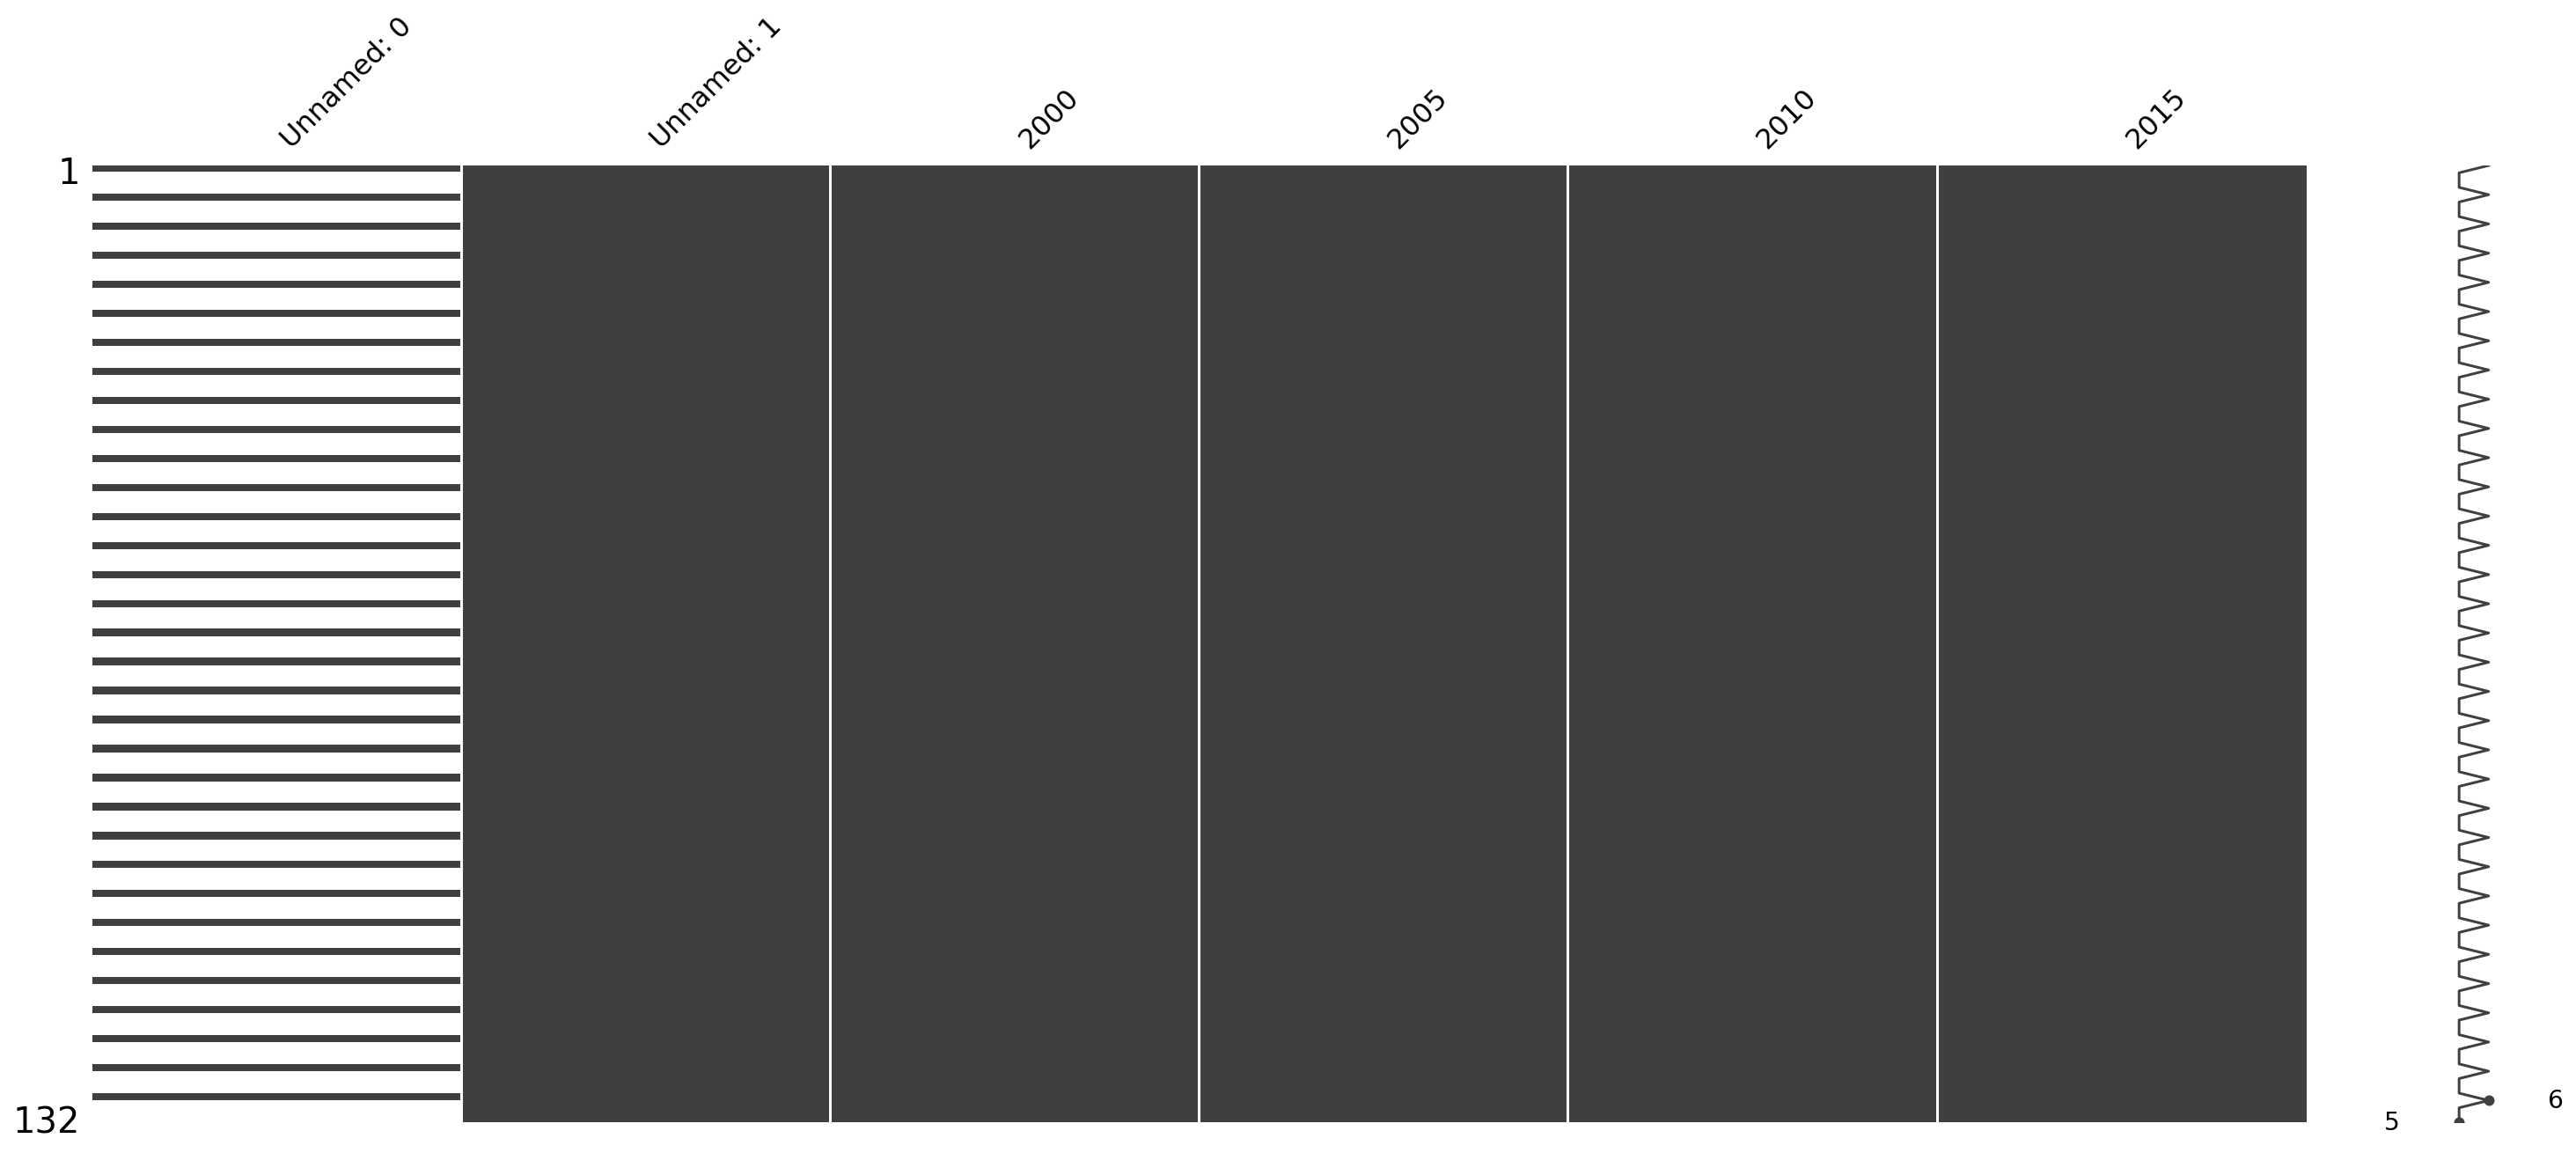

In [ ]:
# Graphic of missing values.
msno.matrix(inegi)

<AxesSubplot:>

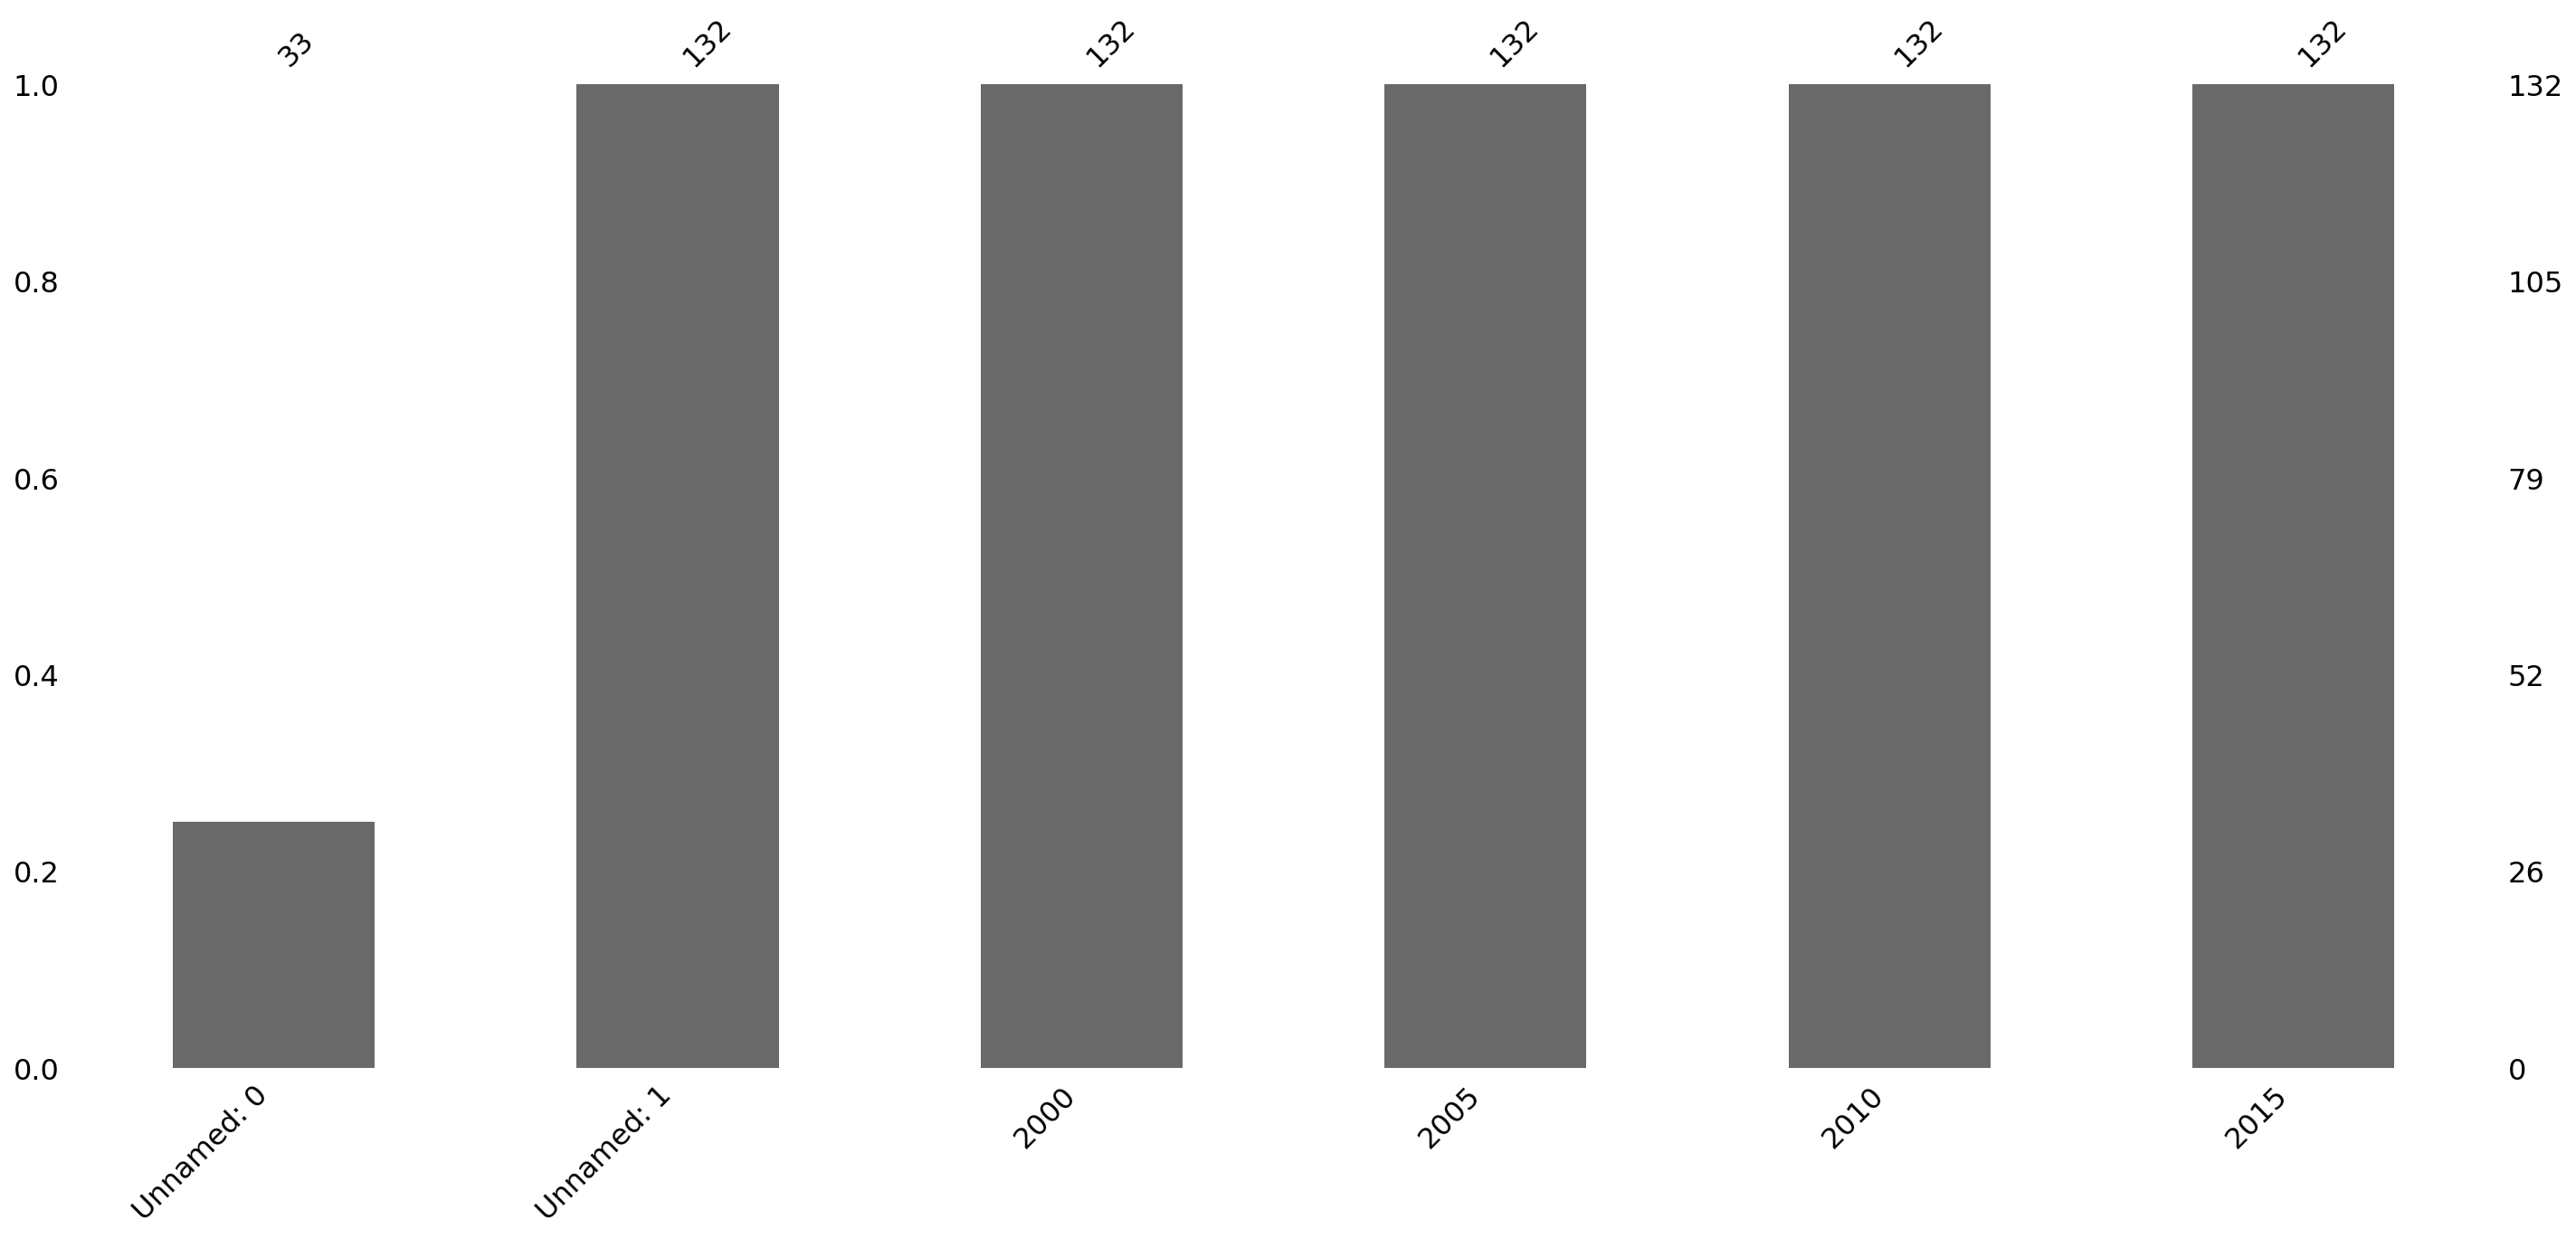

In [ ]:
# Graphic missing values.
msno.bar(inegi)

In [ ]:
# General overview of the dataset.
profile = inegi.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="INEGI_profiling.html")

In [ ]:
# cheking the unique values of the column "Unnamed: 0" where exist lots of missing values.
for estado in enumerate(list(set(inegi["Unnamed: 0"]))):
    print(estado)
# we can see that we have all the states and also we have the NaN values and the total of the cases of the mexican republique (number 24).

(0, nan)
(1, 'México')
(2, 'Ciudad de México')
(3, 'Yucatán')
(4, 'Nayarit')
(5, 'Morelos')
(6, 'Sinaloa')
(7, 'Jalisco')
(8, 'Puebla')
(9, 'Sonora')
(10, 'Nuevo León')
(11, 'Chiapas')
(12, 'Chihuahua')
(13, 'Coahuila de Zaragoza')
(14, 'Estados Unidos Mexicanos')
(15, 'Quintana Roo')
(16, 'Aguascalientes')
(17, 'Tamaulipas')
(18, 'Guanajuato')
(19, 'San Luis Potosí')
(20, 'Guerrero')
(21, 'Veracruz de Ignacio de la Llave')
(22, 'Tabasco')
(23, 'Querétaro')
(24, 'Baja California')
(25, 'Baja California Sur')
(26, 'Durango')
(27, 'Oaxaca')
(28, 'Campeche')
(29, 'Tlaxcala')
(30, 'Michoacán de Ocampo')
(31, 'Hidalgo')
(32, 'Colima')
(33, 'Zacatecas')


In [ ]:
# Renaming columns.
names = {"Unnamed: 0":"Estados","Unnamed: 1":"Condición de alfabetismo"}
inegi = inegi.rename(columns=names)
inegi.head()

,Estados,Condición de alfabetismo,2000,2005,2010,2015
0,Estados Unidos Mexicanos,Total,100.0,100.0,100.0,100.0
1,NaN,Alfabeta,90.5,91.5,92.4,93.6
2,NaN,Analfabeta,9.5,8.4,6.9,5.5
3,NaN,No especificado,0.1,0.2,0.8,0.9
4,Aguascalientes,Total,100.0,100.0,100.0,100.0


In [ ]:
# Deleting the fist 4 rows. They are the total of "Estados Unidos Meicanos".
inegi = inegi.drop([0,1,2,3], axis=0)
inegi.head()

,Estados,Condición de alfabetismo,2000,2005,2010,2015
4,Aguascalientes,Total,100.0,100.0,100.0,100.0
5,NaN,Alfabeta,95.1,95.6,96.2,97.0
6,NaN,Analfabeta,4.8,4.2,3.3,2.6
7,NaN,No especificado,0.1,0.2,0.5,0.4
8,Baja California,Total,100.0,100.0,100.0,100.0


In [ ]:
# Making a copy of the dataset.
df = inegi.copy()
df.head()

,Estados,Condición de alfabetismo,2000,2005,2010,2015
4,Aguascalientes,Total,100.0,100.0,100.0,100.0
5,NaN,Alfabeta,95.1,95.6,96.2,97.0
6,NaN,Analfabeta,4.8,4.2,3.3,2.6
7,NaN,No especificado,0.1,0.2,0.5,0.4
8,Baja California,Total,100.0,100.0,100.0,100.0


In [ ]:
# List of all the states.
estados_list = (list(set(df["Estados"])))
estados_list

[nan,
 'México',
 'Ciudad de México',
 'Yucatán',
 'Nayarit',
 'Morelos',
 'Sinaloa',
 'Jalisco',
 'Puebla',
 'Sonora',
 'Nuevo León',
 'Chiapas',
 'Chihuahua',
 'Coahuila de Zaragoza',
 'Quintana Roo',
 'Aguascalientes',
 'Tamaulipas',
 'Guanajuato',
 'San Luis Potosí',
 'Guerrero',
 'Veracruz de Ignacio de la Llave',
 'Tabasco',
 'Querétaro',
 'Baja California',
 'Baja California Sur',
 'Durango',
 'Oaxaca',
 'Campeche',
 'Tlaxcala',
 'Michoacán de Ocampo',
 'Hidalgo',
 'Colima',
 'Zacatecas']

In [ ]:
# Deleting the NaN value of the list.
estados_list.pop(0)

nan

In [ ]:
# Verifying it.
print("Estados totales", len(estados_list))
print("Estados:\n", estados_list)

Estados totales 32
Estados:
 ['México', 'Ciudad de México', 'Yucatán', 'Nayarit', 'Morelos', 'Sinaloa', 'Jalisco', 'Puebla', 'Sonora', 'Nuevo León', 'Chiapas', 'Chihuahua', 'Coahuila de Zaragoza', 'Quintana Roo', 'Aguascalientes', 'Tamaulipas', 'Guanajuato', 'San Luis Potosí', 'Guerrero', 'Veracruz de Ignacio de la Llave', 'Tabasco', 'Querétaro', 'Baja California', 'Baja California Sur', 'Durango', 'Oaxaca', 'Campeche', 'Tlaxcala', 'Michoacán de Ocampo', 'Hidalgo', 'Colima', 'Zacatecas']


In [ ]:
# the fist 5 rows of the dataset.
df.head()

,Estados,Condición de alfabetismo,2000,2005,2010,2015
4,Aguascalientes,Total,100.0,100.0,100.0,100.0
5,NaN,Alfabeta,95.1,95.6,96.2,97.0
6,NaN,Analfabeta,4.8,4.2,3.3,2.6
7,NaN,No especificado,0.1,0.2,0.5,0.4
8,Baja California,Total,100.0,100.0,100.0,100.0


In [ ]:
# Reseting the index.
df = df.reset_index(drop=True)
df.head()

,Estados,Condición de alfabetismo,2000,2005,2010,2015
0,Aguascalientes,Total,100.0,100.0,100.0,100.0
1,NaN,Alfabeta,95.1,95.6,96.2,97.0
2,NaN,Analfabeta,4.8,4.2,3.3,2.6
3,NaN,No especificado,0.1,0.2,0.5,0.4
4,Baja California,Total,100.0,100.0,100.0,100.0


In [ ]:
# Last 5 values of the dataset.
df.tail()

,Estados,Condición de alfabetismo,2000,2005,2010,2015
123,NaN,No especificado,0.1,0.2,0.8,0.7
124,Zacatecas,Total,100.0,100.0,100.0,100.0
125,NaN,Alfabeta,92.0,92.7,93.9,94.9
126,NaN,Analfabeta,8.0,7.2,5.5,4.4
127,NaN,No especificado,0.1,0.1,0.6,0.8


In [ ]:
# Estates list.
estados_list
# Function to fill the Estados column.
def idx(state_column):
    """
    A function to get all the indexes of the states in the Estados column.
    Parameters: The Estados column.
    Output: A list of index of the states.
    """
    idx_states = []
    final_list = []
    for element in state_column:
        for estado in estados_list:
            if element == estado:
                idx_states.append(df[state_column == estado].index.tolist())
    final_list = [item for sublist in idx_states for item in sublist]
    return final_list

In [ ]:
# Calling the function idx.
total_idx = idx(df["Estados"])
print("Total states", len(total_idx))
print("List of index:", total_idx)

Total states 32
List of index: [0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100, 104, 108, 112, 116, 120, 124]


In [ ]:
# First 13 rows of the dataset.
df.head(13)

,Estados,Condición de alfabetismo,2000,2005,2010,2015
0,Aguascalientes,Total,100.0,100.0,100.0,100.0
1,NaN,Alfabeta,95.1,95.6,96.2,97.0
2,NaN,Analfabeta,4.8,4.2,3.3,2.6
3,NaN,No especificado,0.1,0.2,0.5,0.4
4,Baja California,Total,100.0,100.0,100.0,100.0
5,NaN,Alfabeta,96.3,96.4,96.3,97.6
6,NaN,Analfabeta,3.5,3.1,2.6,2.0
7,NaN,No especificado,0.2,0.5,1.1,0.5
8,Baja California Sur,Total,100.0,100.0,100.0,100.0
9,NaN,Alfabeta,95.7,95.8,96.1,96.8


In [ ]:
print(estados_list)
print("\n")
print(total_idx)

['México', 'Ciudad de México', 'Yucatán', 'Nayarit', 'Morelos', 'Sinaloa', 'Jalisco', 'Puebla', 'Sonora', 'Nuevo León', 'Chiapas', 'Chihuahua', 'Coahuila de Zaragoza', 'Quintana Roo', 'Aguascalientes', 'Tamaulipas', 'Guanajuato', 'San Luis Potosí', 'Guerrero', 'Veracruz de Ignacio de la Llave', 'Tabasco', 'Querétaro', 'Baja California', 'Baja California Sur', 'Durango', 'Oaxaca', 'Campeche', 'Tlaxcala', 'Michoacán de Ocampo', 'Hidalgo', 'Colima', 'Zacatecas']


[0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100, 104, 108, 112, 116, 120, 124]


In [ ]:
# looking for the state with index 4.
df["Estados"].loc[df["Estados"].index == 4]

4    Baja California
Name: Estados, dtype: object

In [ ]:
# Creating a copy of the dataframe.
copiadf = df.copy()
copiadf["Estados"][0]

'Aguascalientes'

In [ ]:
# Dimension of the dataframe.
copiadf.shape

(128, 6)

### Filling the NaN values of the Estados column with its respective state name.

In [ ]:
# Filling the NaN values of the Estados column with its respective state name.
for element_idx in range(len(copiadf["Estados"])):
    for idx in total_idx:
        counter = 0
        if element_idx == idx:
            counter = idx
            for _ in range(4):
                copiadf["Estados"][counter] = (copiadf["Estados"][idx])
                counter += 1
copiadf.head()

<ipython-input-33-6752e9a19612>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copiadf["Estados"][counter] = (copiadf["Estados"][idx])


,Estados,Condición de alfabetismo,2000,2005,2010,2015
0,Aguascalientes,Total,100.0,100.0,100.0,100.0
1,Aguascalientes,Alfabeta,95.1,95.6,96.2,97.0
2,Aguascalientes,Analfabeta,4.8,4.2,3.3,2.6
3,Aguascalientes,No especificado,0.1,0.2,0.5,0.4
4,Baja California,Total,100.0,100.0,100.0,100.0


### Deleting the Total value of each state in the "condición de alfabetismo" column.

In [ ]:
# Deleting the Total value of each state in the "condición de alfabetismo" column.
copiadf = copiadf.drop(df.loc[copiadf["Condición de alfabetismo"]=="Total"].index)
copiadf.head(12)

,Estados,Condición de alfabetismo,2000,2005,2010,2015
1,Aguascalientes,Alfabeta,95.1,95.6,96.2,97.0
2,Aguascalientes,Analfabeta,4.8,4.2,3.3,2.6
3,Aguascalientes,No especificado,0.1,0.2,0.5,0.4
5,Baja California,Alfabeta,96.3,96.4,96.3,97.6
6,Baja California,Analfabeta,3.5,3.1,2.6,2.0
7,Baja California,No especificado,0.2,0.5,1.1,0.5
9,Baja California Sur,Alfabeta,95.7,95.8,96.1,96.8
10,Baja California Sur,Analfabeta,4.2,3.6,3.2,2.5
11,Baja California Sur,No especificado,0.1,0.6,0.7,0.7
13,Campeche,Alfabeta,88.1,89.5,90.9,92.9


## Decision Tree

we used Supervised machine learning a Decision Tree Algorithm.
We will teach to the machine the ability to determine if the given data corresponds either "Alfabeta", "Analfabeta", or "No especificado".
This corresponds to the classification of the Condition literacy. 

In [ ]:
# Library.
from sklearn import tree

### First we create a dictionary with the meaning of each label.

In [ ]:
# First we create a dictionary with the meaning of each label.
condition = ["Alfabeta", "Analfabeta", "No especificado"]
key = [1,2,3]
dictionary = dict(zip(key, condition))
print("Diccionray:\n",dictionary)

Diccionray:
 {1: 'Alfabeta', 2: 'Analfabeta', 3: 'No especificado'}


### We have to select the state of interest.

In [ ]:
features = copiadf[copiadf["Estados"] == "Yucatán"]
features

,Estados,Condición de alfabetismo,2000,2005,2010,2015
121,Yucatán,Alfabeta,87.6,88.9,90.0,91.9
122,Yucatán,Analfabeta,12.3,10.9,9.2,7.4
123,Yucatán,No especificado,0.1,0.2,0.8,0.7


### Creating the features and labels

In [ ]:
features = features[["2000", "2005", "2010", "2015"]].values
labels = [1,2,3]
print("Features:\n", features)
print("Labels:\n", labels)

Features:
 [[87.6 88.9 90.  91.9]
 [12.3 10.9  9.2  7.4]
 [ 0.1  0.2  0.8  0.7]]
Labels:
 [1, 2, 3]


### Using the Decision Tree Classifier Function

In [ ]:
# Decision Tree Classifier Function from sklearn.
classifier = tree.DecisionTreeClassifier()
classifier

DecisionTreeClassifier()

###  Training the data.

In [ ]:
# Training the data.
classifier.fit(features, labels)

DecisionTreeClassifier()

## Testing the Tree Classifier

In [ ]:
# List of elements that will use for the prediction test.
test = [0.1,0.2,0.8,0.7]
prediction = classifier.predict([test])
print("Prediction:\n", prediction)

Prediction:
 [3]


### Accessing to the dictionary to get the value.

In [ ]:
# Using the dictionary to verify the condition literacy.
result = dictionary[(prediction[0])]
print("The condition of literacyis:\n")
print(Fore.WHITE+ Back.BLACK+result)

The condition of literacyis:

No especificado


we can put all of this inside a for loop but at the end, the finality of the activity is learning how to apply an classification algorithm and we already have done with the implementation of the Decision Tree Algorithm to determine the condition literacy in the state of Yucatán.

Maybe you are wondering, this can be solved with an if and else, yes but when you are a human being and you have the conditions that can occur.
This algorithm will be execute for the machine and the objetive is that the machine be who take the final decision, an another important factor is that at the end, in real world cases you have lots of data and can be nearly impossible do it with and if and else. This is when machine learning arrives to solve this problem.